In [1]:
from labs.install_deps import require_think_dsp

require_think_dsp()

thinkdsp.py successfully download


Упражнение 1.2
Я скачала с сайта freesound.org образец звука крокодила.

In [3]:
from thinkdsp import read_wave

wave = read_wave('crocodyle.wav')
wave.normalize()
wave.make_audio()

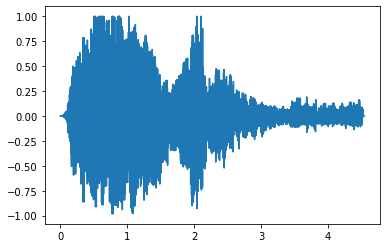

In [4]:
wave.plot()

Выделим полусекундный сегмент, в котором высота постоянна.

In [7]:
segment = wave.segment(start=0.3, duration=0.5)
segment.make_audio()

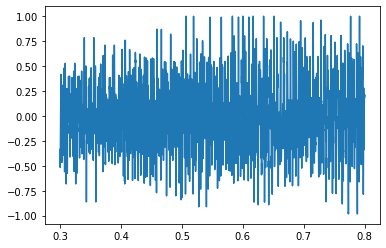

In [8]:
segment.plot()

Вычислим и распечатаем спектр этого сегмента.

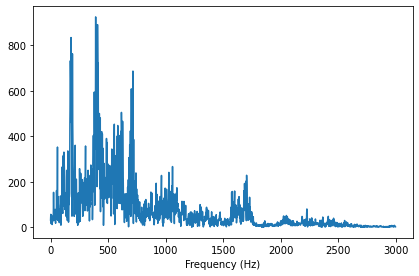

In [16]:
from thinkdsp import decorate

spectrum = segment.make_spectrum()
decorate(xlabel='Frequency (Hz)')

spectrum.plot(high=3000)

Посмотрим поближе на основную и доминирующую частоты.

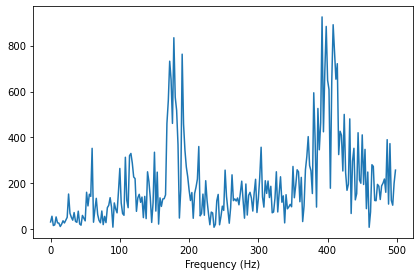

In [39]:
decorate(xlabel='Frequency (Hz)')
spectrum.plot(high=500)

Тембр - это характеристика звукового ощущения, которая определяется его гармоническим спектром.

Выведем высшие вершины в спектре и их частоты в убывающем порядке.

In [38]:
spectrum.peaks()[:30]

[(925.1445478377967, 392.0),
 (891.1772559220777, 408.0),
 (883.7342241169425, 398.0),
 (834.4594355216186, 178.0),
 (773.2267000024458, 410.0),
 (762.9130273457494, 190.0),
 (732.3473672933911, 172.0),
 (721.4551087494852, 414.0),
 (690.5441403315447, 396.0),
 (687.0255702495158, 716.0),
 (653.8993153756721, 412.0),
 (652.5352988058743, 174.0),
 (649.3466501102275, 400.0),
 (644.2115017966988, 406.0),
 (609.1180485722329, 402.0),
 (608.6938227370889, 702.0),
 (594.7256292195938, 380.0),
 (575.6276549113261, 180.0),
 (560.7587439484768, 170.0),
 (555.990596289121, 706.0),
 (526.4559861310233, 386.0),
 (518.2319712301615, 182.0),
 (505.3031597409333, 616.0),
 (500.58603477411975, 424.0),
 (481.08927643365143, 432.0),
 (466.2227489888148, 626.0),
 (464.06599564761507, 390.0),
 (461.40296450077835, 176.0),
 (461.1031923729915, 168.0),
 (458.7191690671168, 192.0)]

Доминирующая частота на 392 Гц. Основную частоту довольно сложно разглядеть, но она на 60 Гц.

Отфильтруем гармоники с помощью low_pass и high_pass. Затем преобразуем спектр обратно в сигнал и послушаем.

In [48]:
spectrum.low_pass(cutoff=800, factor=0.5)
spectrum.high_pass(cutoff=100, factor=0.5)

In [49]:
spectrum.make_wave().make_audio()

Мы ослабили компоненты на 50% выше (800 Гц) и ниже (100 Гц) частоты среза. Звук стал более глухой, сдавленный.

Упражнение 1.3
Создадим сложный сигнал из компонентов SinSignal и CosSignal, суммируя их.

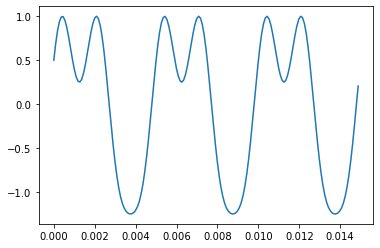

In [54]:
from thinkdsp import SinSignal, CosSignal

signal = (SinSignal(freq=200, amp=1.0) +
          CosSignal(freq=400, amp=0.5) +
          SinSignal(freq=600, amp=0.25))
signal.plot()

Получим wave и прослушаем сигнал.

In [55]:
wave2 = signal.make_wave(duration=1)
wave2.apodize()

In [56]:
wave2.make_audio()

Вычислим и посмотрим на спектр.

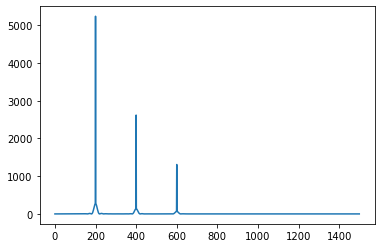

In [59]:
spectrum = wave2.make_spectrum()
spectrum.plot(high=1500)

Если мы добавим частотную компоненту, не кратную остальным, то будем слышать звук более "дискретно" и менее плавно.

In [60]:
signal += SinSignal(freq=250)
signal.make_wave().make_audio()

Упражнение 1.4
Напишем функцию stretch, берущую wave и коэффициент изменения. Она должна ускорять или замедлять сигнал изменением
ts и framerate. Для примера возьмем снова звук крокодила.

In [69]:
wave3 = read_wave('crocodyle.wav')
wave3.normalize()
wave3.make_audio()

In [67]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

In [70]:
stretch(wave3, 2)
wave3.make_audio()

Мы получили звук, замедленный в два раза.

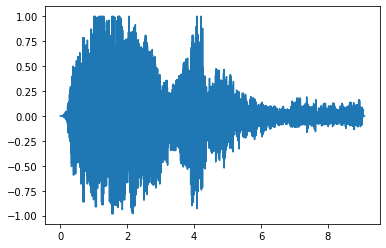

In [71]:
wave3.plot()

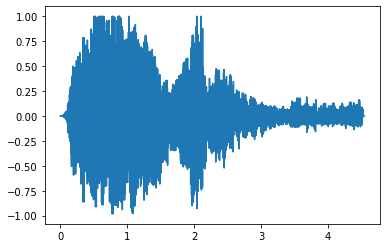

In [72]:
wave.plot()